Theory:
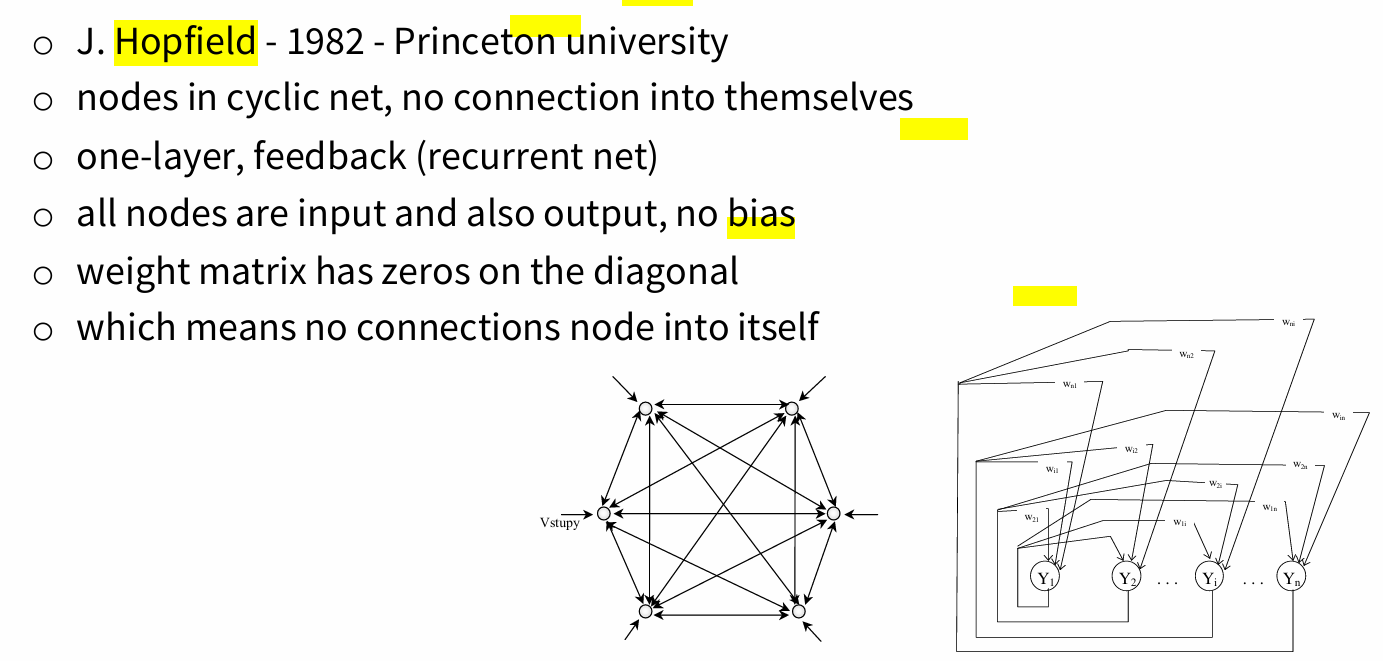

Key points:
1 Hebbian rule/ Hebbian  learning: "Fire together, wire together."--states of 2 neurons are the same (both +1 or both -1), then the connection (weight △w=si.sj) of the 2 neurons will be strengthened, otherwise will be weakened, (xor logic). Coding example:

In [1]:
from random import Random

import numpy as np

# Define the Hebbian learning function
def hebbian_learning(weights, inputs):
    for i in range(len(inputs)):
        for j in range(len(inputs)):
            if i != j:
                weights[i, j] += inputs[i] * inputs[j]
    return weights

# Initialize the weights matrix and input patterns
weights = np.zeros((3, 3))
inputs = np.array([1, -1, 1])

# Apply Hebbian learning
weights = hebbian_learning(weights, inputs)

print("Updated weights matrix:")
print(weights)


Updated weights matrix:
[[ 0. -1.  1.]
 [-1.  0. -1.]
 [ 1. -1.  0.]]


2 Pattern is a binary vector e.g. [1,-1,1] or letter_H = np.array([ +1, -1, -1, -1, +1, +1, -1, -1, -1, +1, +1, +1, +1, +1, +1, +1, -1, -1, -1, +1, +1, -1, -1, -1, +1 ]), which looks like a letter "H" . Coding example:

[ 1 -1  1]
[-1  1 -1]
Original Letter H:


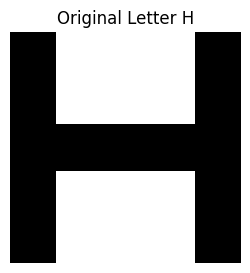

Original Letter L:


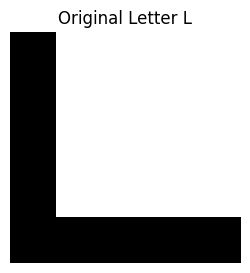

Original Letter I:


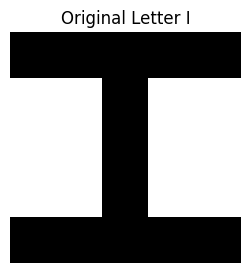

In [2]:
import matplotlib.pyplot as plt

pattern1=np.array([1,-1,1])
pattern2=np.array([-1,1,-1])
print(pattern1)
print(pattern2)

# Define letters H, L, I as binary patterns (e.g., 5x5 grids)
letter_H = np.array([
    +1, -1, -1, -1, +1,
    +1, -1, -1, -1, +1,
    +1, +1, +1, +1, +1,
    +1, -1, -1, -1, +1,
    +1, -1, -1, -1, +1
])

letter_L = np.array([
    +1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1,
    +1, +1, +1, +1, +1
])

letter_I = np.array([
    +1, +1, +1, +1, +1,
    -1, -1, +1, -1, -1,
    -1, -1, +1, -1, -1,
    -1, -1, +1, -1, -1,
    +1, +1, +1, +1, +1
])

patterns = [letter_H, letter_L, letter_I]

letters = {
    "H": letter_H,
    "L": letter_L,
    "I": letter_I
}

def plot_letter(pattern, shape, title=""):
    """Plot a letter represented as a binary pattern with reversed colors. Because the default color is +1 white and -1 black and we want the opposite"""
    plt.figure(figsize=(3, 3))
    # Invert the pattern: +1 -> -1, -1 -> +1
    inverted_pattern = np.where(pattern == 1, -1, 1)
    plt.imshow(inverted_pattern.reshape(shape), cmap='gray', interpolation='none')
    plt.title(title)
    plt.axis('off')
    plt.show()

for letter_name, letter_pattern in letters.items():
    print(f"Original Letter {letter_name}:")
    plot_letter(letter_pattern, shape=(5, 5), title=f"Original Letter {letter_name}")

3 The weight of the whole Hopfield network w=∑p.pT-n.I (I for Identity Matrix)

In [3]:
# Combine the patterns into a matrix
patterns12 = np.array([pattern1, pattern2])

# Initialize the weight matrix
N = len(pattern1)
weights = np.zeros((N, N))

# Calculate the weight matrix using Hebbian learning
for pattern in patterns12:
    weights += np.outer(pattern, pattern)

# Subtract the identity matrix*pattern count to ensure no self-connections
weights -= 2*(np.identity(N))

print("Weight matrix:")
print(weights)


Weight matrix:
[[ 0. -2.  2.]
 [-2.  0. -2.]
 [ 2. -2.  0.]]


4 A test sample (same length vector as the patterns) with noise is given, noise here means pattern element value flipped from 1 to -1 or -1 to 1 e.g. pattern [1,-1,1] after adding noise becomes [1,1,1], the 2nd element became from -1 to 1, so the test sample is [1,1,1]

In [4]:
# Example of np.random.choice(array, how many elements to select, same element can be selected more than once or not )
'''We define an array array with elements [1, 2, 3, 4, 5].

We use np.random.choice to randomly select 3 elements from the array without replacement (meaning the same element cannot be selected more than once).

We print the original array and the selected elements.'''
array = np.array([1, 2, 3, 4, 5])
selected_elements = np.random.choice(array, 3, replace=False)
print("Original array:", array)
print("Selected elements:", selected_elements)

# when the np.random.choice(here is a number e.g.3, 2, replace=False), means you put an array np.array(range(3)) at the 1st parameter, np.array(range(3)) is array([0,1,2])
print(np.array(range(3)))
print(np.random.choice(3, 2, replace=False))

Original array: [1 2 3 4 5]
Selected elements: [2 3 4]
[0 1 2]
[0 2]


In [5]:
# Function to add noise to the pattern, noise_level is how many nubmers inside the pattern you're gonna flip
def add_noise(pattern, noise_level=1):
    noisy_pattern = pattern.copy()
    indices = np.random.choice(len(pattern), noise_level, replace=False)
    for index in indices:
        noisy_pattern[index] *= -1
    return noisy_pattern

# Add noise to the pattern
noisy_pattern1 = add_noise(pattern1, noise_level=1)

print("Original pattern:", pattern1)
print("Noisy pattern:", noisy_pattern1)


Original pattern: [ 1 -1  1]
Noisy pattern: [-1 -1  1]


5 Recall/Inference/update:(synchronous (all at once))
update rule:

Energy E(s_i)=-0.5.s_i_T.w.s_i

activation=∑w_ij*s_j
s_i=sign(activation)=sign(∑w_ij*s_j)  
sign(x)=1 if x>=0, sign(x)=-1 if x<0

stop criteria:

1) When state doesn't change anymore

2) When energy change < a small threshold e.g. 1e-6

In [6]:
# np.sign(x) example, sign(x)=1 if x>=0, sign(x)=-1 if x<0
# Define an array of numbers
numbers = np.array([-5, -0.5, 0, 0.5, 5])

# Apply the sign function
signs = np.sign(numbers)

print("Original numbers:", numbers)
print("Signs:", signs)


Original numbers: [-5.  -0.5  0.   0.5  5. ]
Signs: [-1. -1.  0.  1.  1.]


initial state s0 is the noisy_pattern1 [[-1],[-1],[1]],

w=[[ 0. -2.  2.]
 [-2.  0. -2.]
 [ 2. -2.  0.]]

Energy E(s0)=-0.5.s0_T.w.s0

w.s0=[[0*(-1)+(-2)*(-1)+2*1], [(-2)*(-1)+0*(-1)+(-2)*1], [2*(-1)+(-2)*(-1)+0*1]]=[[4],[0],[0]]

s0_T.w.s0=[-1,-1,1]*[[4],[0],[0]]=(-1)*4+(-1)*0+1*0=-4

E(s0)=-0.5.s0_T.w.s0=-0.5*(-4)=2

now we compute new state s1 for each neuron:

Neuron 0:

activation0=w00.s00+w01.s01+w02.s02

so activation0=0*(-1)+(-2)*(-1)+2*1=4

so s10=sign(activation0)=1

Neuron 1:

activation1=w10.s00+w11.s01+w12.s02=(-2)*(-1)+0*(-1)+(-2)*1=0

so s11=sign(activation1)=1

Neuron 2:

activation2=w20.s00+w21.s01+w22.s02=2*(-1)+(-2)*(-1)+0*1=0

so s12=sign(activation2)=1

so s1=[[1],[1],[1]]

calculate Energy again:

E(s1)=procedures are the same as above=2

The energy didn't decrease, so we continue, repeat the above, we need the energy decrease to a local minimum

calculate s2 for each neuron:

activation0=w00.s10+w01.s11+w02.s12=0*1+(-2)*1+2*1=0

so s20=1

activation1=w10.s10+w11.s11+w12.s12=(-2)*1+0*1+(-2)*1=-4

so s21=-1

activation2=w20.s10+w21.s11+w22.s12=2*1+(-2)*1+0*1=0

so s22=1

so s2=[[1],[-1],[1]]

calculate E(s2)=-6, so we can stop and then the recalled result is [[1],[-1],[1]] which is the same as the pattern1 or we can continue until reached the stop criteria:

1) When state doesn't change anymore

2) When energy change < a small threshold e.g. 1e-6

In [7]:
W = weights
s0=noisy_pattern1.reshape(-1,1)
print(W)
print(s0)

[[ 0. -2.  2.]
 [-2.  0. -2.]
 [ 2. -2.  0.]]
[[-1]
 [-1]
 [ 1]]


In [8]:
# Energy calculation function
def calculate_energy(state):
    return -0.5 * state.T @ W @ state

# Asynchronous state update function
def update_state(state):
    new_state = state.copy()
    for i in range(len(state)):  # Update each neuron one by one
        activation = W[i] @ new_state
        new_state[i] = np.sign(activation)
    return new_state

# Synchronous state update function
def update_state_synchronous(state):
    activations = W @ state  # Compute activations for all neurons
    new_state = np.sign(activations)  # Apply activation function
    return new_state

update_func=update_state_synchronous # update_func=update_state

# Execute the network update process
current_state = s0.copy()
energy = calculate_energy(current_state)
threshold = 1e-6
step = 0

print("Hopfield Network Recall Process:")
print("="*40)

while True:
    print(f"Step {step}:")
    print(f"State:\n{current_state.flatten()}")
    print(f"Energy: {energy[0][0]:.1f}\n")

    # Update state
    new_state = update_func(current_state)
    new_energy = calculate_energy(new_state)

    # Check energy change
    if abs(new_energy - energy) < threshold:
        print("Convergence reached!")
        break

    current_state = new_state
    energy = new_energy
    step += 1

# Final result verification
final_pattern = current_state.flatten()
original_pattern = pattern1

print("\nFinal Result:")
print(f"Recalled Pattern: {final_pattern}")
print(f"Original Pattern: {original_pattern}")
if np.array_equal(final_pattern, original_pattern):
    print("Recall Successful!")
else:
    print("Recall Failed")

Hopfield Network Recall Process:
Step 0:
State:
[-1 -1  1]
Energy: 2.0

Step 1:
State:
[1. 0. 0.]
Energy: 0.0

Step 2:
State:
[ 0. -1.  1.]
Energy: -2.0

Step 3:
State:
[ 1. -1.  1.]
Energy: -6.0

Convergence reached!

Final Result:
Recalled Pattern: [ 1. -1.  1.]
Original Pattern: [ 1 -1  1]
Recall Successful!


Homework:

now implement your Hopfield network and use letters = {
    "H": letter_H,
    "L": letter_L,
    "I": letter_I
} as patterns and add noise and recall the letters :)

# My implementation <3


In [9]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        self.weights = np.zeros((self.size, self.size))
        for p in patterns:
            p = p.reshape(self.size, 1)
            self.weights += np.dot(p, p.T)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, steps=5):
        output = pattern.copy()
        for _ in range(steps):
            output = np.sign(self.weights @ output)
            output[output == 0] = 1
        return output

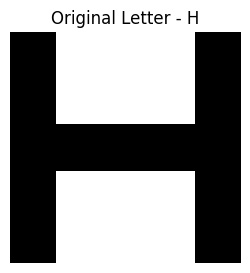

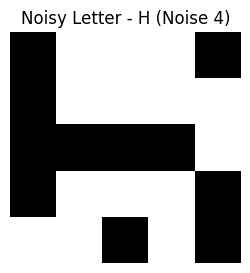

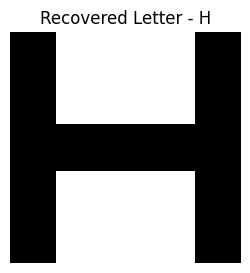

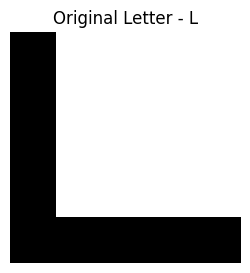

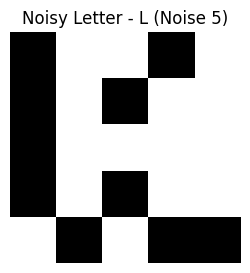

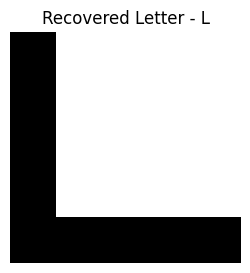

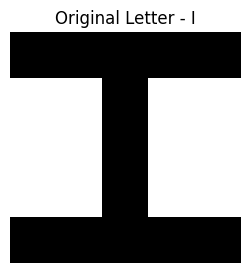

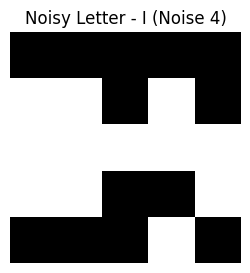

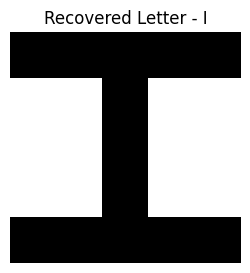

In [18]:
patterns = [letter_H, letter_L, letter_I]
hopfield_net = HopfieldNetwork(size=25)
hopfield_net.train(patterns)
for letter_name, pattern in letters.items():
    noise_level = np.random.randint(4, 6)
    noisy_pattern = add_noise(pattern, noise_level=noise_level)
    recovered_pattern = hopfield_net.recall(noisy_pattern, steps=5)

    plot_letter(pattern, shape=(5, 5), title=f"Original Letter - {letter_name}")
    plot_letter(noisy_pattern, shape=(5, 5), title=f"Noisy Letter - {letter_name} (Noise {noise_level})")
    plot_letter(recovered_pattern, shape=(5, 5), title=f"Recovered Letter - {letter_name}")

## 1) What are the advantages and disadvantages of the Hopfield network compared with perceptron and feedforward networks? What are possible solutions to overcome the disadvantages?
### Advantages:
- Can store and recall patterns even with noisy input
- Simple and biologically inspired learning rule (Hebbian learning)
### Disadvantages:
- Low memory capacity (about 0.15 * number of neurons)
- Can fall into incorrect or unstable states (local minima)
- Not suitable for general classification tasks
### Possible solutions:
- Use stochastic models (e.g., Boltzmann machines)
- Reduce correlation between stored patterns
- Use more advanced recurrent networks (e.g., LSTM, GRU)

## 2) What happens when you change the noise level? What causes it? If it's a problem, how can it be solved?
- As the noise level increases, the Hopfield network becomes less reliable in recalling the original pattern. Eventually, the network may fail to recover the original pattern.
### Cause:
- Noise shifts the pattern too far from the stored attractor in the energy landscape, and the network gets pulled into a different attractor.
### Solutions:
- Limit the number of stored patterns
- Increase the number of neurons (larger resolution)

## 3) What will happen if you add 3 more letters (e.g., H, L, I, N, K, C)? Why? What are the possible solutions if it becomes a problem?
- Patterns interfere with each other
- Incorrect or unstable recall
- Emergence of spurious (non-original) patterns
### Solutions:
- Use larger patterns (e.g., 10x10 instead of 5x5)
- Reduce number of stored patterns
